**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [4]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [3]:
#Setting variable
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

In [5]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

**Figure 1: Creating a plot with 10 random points between 0 and 100. The placement of the point could fall anywhere within the error bar.**

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

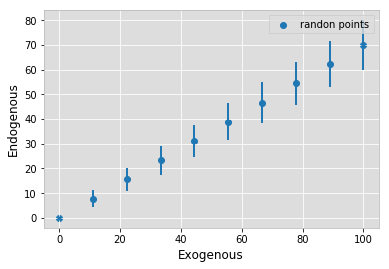

In [87]:
#creating a plot with 10 random points between 0 and 100.
#adding error bars to plot
#np.random.seed(123)
x = np.linspace(0,100,10) 
y = line(0.7,x)
pl.scatter(x,y, label = "randon points")
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();

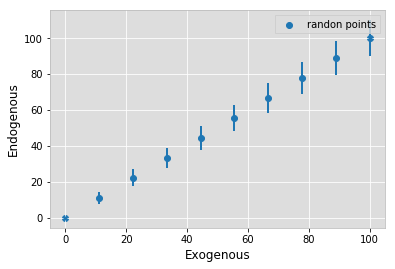

In [91]:
#creating a plot with 10 random points between 0 and 100.
#adding error bars to plot
#np.random.seed(123)
x = np.linspace(0,100,10) 
y = line(1,x)
pl.scatter(x,y, label = "randon points")
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          2.62e-111
Time:                        20:10:49   Log-Likelihood:                -299.33
No. Observations:                 100   AIC:                             600.7
Df Residuals:                      99   BIC:                             603.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0079      0

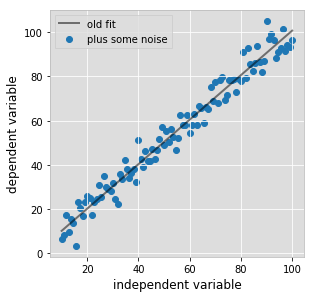

In [86]:
y = y + np.random.randn(100) * 2.5
mrold = mrnew

#I use just OLD: the ordinary square fit which does not take the error bars 
#into account
#refer to statsmodels documentation!!
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.986e+32
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:05:32   Log-Likelihood:                 2981.8
No. Observations:                 100   AIC:                            -5962.
Df Residuals:                      99   BIC:                            -5959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0000   4.48

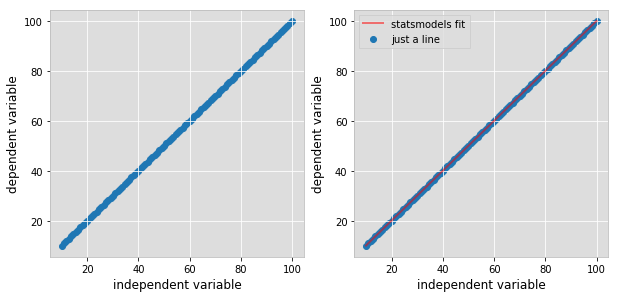

In [80]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)

mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "just a line")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, 
         label = "statsmodels fit")
ax2.legend()


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          6.29e-113
Time:                        20:10:00   Log-Likelihood:                -295.47
No. Observations:                 100   AIC:                             592.9
Df Residuals:                      99   BIC:                             595.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0072      0

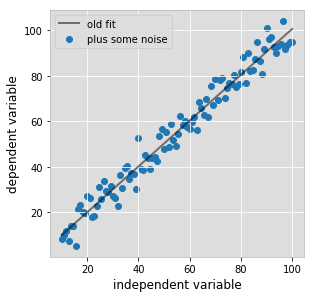

In [85]:
y = y + np.random.randn(100) * 2.5
mrold = mrnew

#I use just OLD: the ordinary square fit which does not take the error bars 
#into account
#refer to statsmodels documentation!!
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()



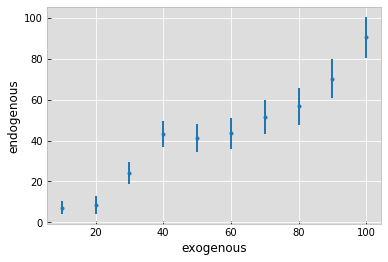

In [44]:
#This is Professor's Code

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [20]:
x_with_constant_added = sm.add_constant(x)
print("This is the dependent (response) aka endogenous variable:", y)
print("This is the independent (predictor) aka exogenous variable:", x)
print("This is what the independent (predictor) aka exogenous variable looks like with a constant added to it:", x_with_constant_added)

This is the dependent (response) aka endogenous variable: [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
This is the independent (predictor) aka exogenous variable: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
This is what the independent (predictor) aka exogenous variable looks like with a constant added to it: [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [141]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.181e+32
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          1.52e-142
Time:                        18:06:59   Log-Likelihood:                 359.41
No. Observations:                  10   AIC:                            -716.8
Df Residuals:                       9   BIC:                            -716.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5000   3.39e-17   1.48e+16      0.000         0.500     0.500
==============================================================================
Omnibus:                       10.398   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.444
Skew:                           1.291   Prob(JB):                        0.108
Kurtosis:                       5.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#The Right Way - done by me
smfit_right = sm.OLS(y, x_with_constant_added).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.410e+31
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          3.32e-123
Time:                        18:07:02   Log-Likelihood:                 358.90
No. Observations:                  10   AIC:                            -713.8
Df Residuals:                       8   BIC:                            -713.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -8.327e-17   5.97e-17     -1.395      0.201     -2.21e-16  5.44e-17
x1             0.5000   1.02e-16   4.91e+15      0.000         0.500     0.500
==============================================================================
Omnibus:                        7.957   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.194
Skew:                          -1.268   Prob(JB):                        0.203
Kurtosis:                       4.109   Cond. No.                         6.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     60.79
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           5.25e-05
Time:                        12:14:00   Log-Likelihood:                -35.023
No. Observations:                  10   AIC:                             74.05
Df Residuals:                       8   BIC:                             74.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1669      6.134     -0.353      0.733     -16.312      11.978
x1             0.7708      0.099      7.797      0.000       0.543       0.999
==============================================================================
Omnibus:                        0.832   Durbin-Watson:                   2.881
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.060
Skew:                           0.189   Prob(JB):                        0.971
Kurtosis:                       2.980   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

In [125]:
x

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [148]:
smfit_right.predict()

array([ 0.34823459,  0.14306967,  0.11342573,  0.27565738,  0.35973448,
        0.21155323,  0.4903821 ,  0.34241487,  0.24046595,  0.19605876])

In [149]:
smfit_wrong.predict()

array([ 0.34823459,  0.14306967,  0.11342573,  0.27565738,  0.35973448,
        0.21155323,  0.4903821 ,  0.34241487,  0.24046595,  0.19605876])

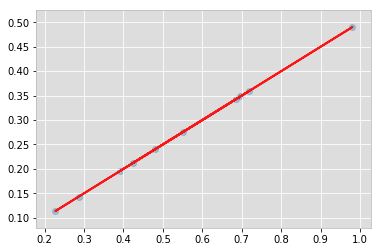

In [143]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, smfit_wrong.predict(x), 'r', alpha=0.9)

ValueError: x and y must be the same size

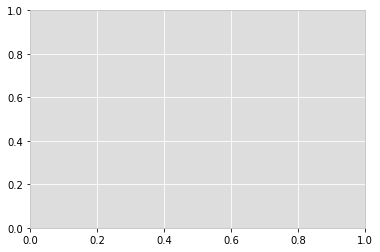

In [130]:
plt.scatter(x_with_constant_added, y, alpha=0.3)

In [116]:
smfit_wrong.params

array([ 0.5])

In [117]:
smfit_right.params

array([-15.,   1.])

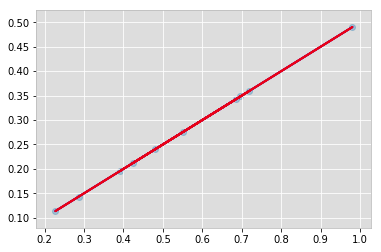

In [144]:
#splt = plt.subplot(121)
# smfit_wrong, smfit_right

plt.scatter(x, y, alpha=0.3)
#plt.plot(x_with_constant_added, smfit_right.predict(), 'r', alpha=0.9)
plt.plot(x, smfit_wrong.predict(), 'b', alpha=0.9)
plt.plot(x, smfit_right.predict(), 'r', alpha=0.9)
#plt.plot(x_with_constant_added, smfit_wrong.predict(), 'g', alpha=0.9)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

# 6. repeat step 3

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

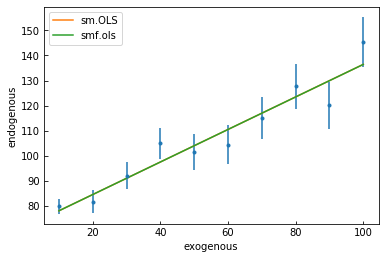

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();